In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
iris_dataset = load_iris()

In [5]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
df = pd.concat([pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names),pd.Series(iris_dataset.target,name='iris_type')],axis=1)

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
X = df.drop(columns=['iris_type'])
y = df['iris_type']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

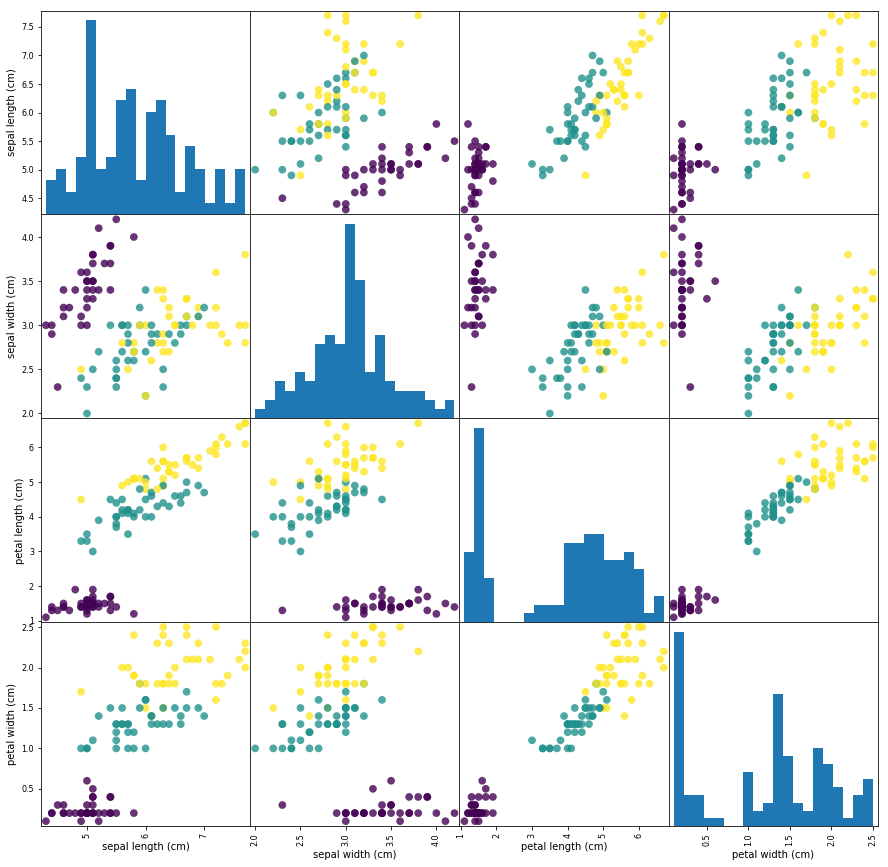

In [46]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8);

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
knn_preds = knn.predict(X_test)

In [51]:
knn_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [64]:
accuracy_score(knn_preds, y_test)

1.0

In [66]:
knn_preds == y_test

73     True
18     True
118    True
78     True
76     True
31     True
64     True
141    True
68     True
82     True
110    True
12     True
36     True
9      True
19     True
56     True
104    True
69     True
55     True
132    True
29     True
127    True
26     True
128    True
131    True
145    True
108    True
143    True
45     True
30     True
22     True
15     True
65     True
11     True
42     True
146    True
51     True
27     True
Name: iris_type, dtype: bool

In [67]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [68]:
knn.predict(X_new)

array([0])